## 代表的な前処理（正規化・標準化）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 正規化、標準化の重要性

* 尺度の異なる変数が混在している場合(例えば1~10と1~1,000,000など)、尺度の大きな変数ほどモデルへの影響度が大きくなることがある。
* これを回避するために、あらかじめ尺度を揃えておくことがよく行われる。
* 尺度を揃える方法として、正規化や標準化がある。
* 尺度の影響を受けるかどうかはアルゴリズムによる。  
    * 影響を受けるアルゴリズムの例:k近傍法、ニューラルネットワーク
    * 影響を受けないアルゴリズムの例：決定木、ランダムフォレスト

## 正規化と標準化の計算

In [2]:
df = pd.DataFrame({"input":[0,1,2,3,4,5]},dtype=float)

# 正規化
df["normalized"] = (df["input"] - df["input"].min()) / (df["input"].max() - df["input"].min())

#標準化
df["standardized"] = (df["input"] - df["input"].mean()) / df["input"].std(ddof=0)

display(df)

,input,normalized,standardized
0,0.0,0.0,-1.46385
1,1.0,0.2,-0.87831
2,2.0,0.4,-0.29277
3,3.0,0.6,0.29277
4,4.0,0.8,0.87831
5,5.0,1.0,1.46385


## Scikit-learnを用いて正規化と標準化を行う方法

In [3]:
# 正規化の例
# 正規化とは、全データを0-1の範囲におさめる操作
from sklearn.preprocessing import MinMaxScaler
df = pd.DataFrame({"input":[0,1,2,3,4,5]},dtype=float)
mms = MinMaxScaler()
mms.fit_transform(df[["input"]].values)

array([[0. ],
       [0.2],
       [0.4],
       [0.6],
       [0.8],
       [1. ]])

In [4]:
# 標準化の例
# 標準化とは、平均を引いて、標準偏差で割る操作
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame({"input":[0,1,2,3,4,5]},dtype=float)
stdsc = StandardScaler()
stdsc.fit_transform(df[["input"]].values)

array([[-1.46385011],
       [-0.87831007],
       [-0.29277002],
       [ 0.29277002],
       [ 0.87831007],
       [ 1.46385011]])

## 正規化と標準化の違いを理解するためのシミュレーション

,a,b
0,0.471435,98.417792
1,-1.190976,98.379810
2,1.432707,100.046562
3,-0.312652,98.320171
4,-0.720589,101.395892
5,0.887163,99.155029
6,0.859588,100.814007
7,-0.636524,99.950258
8,0.015696,100.534247
9,-2.242685,99.192991


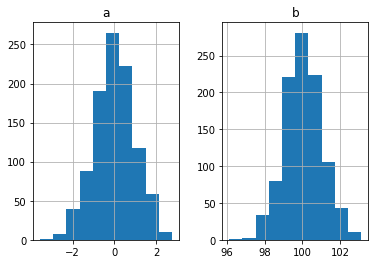

In [5]:
np.random.seed(1234)
df = pd.DataFrame({"a":np.random.normal(loc=0,scale=1,size=1000),
                                   "b":np.random.normal(loc=100,scale=1,size=1000)})
display(df.head(10))
df.hist()
plt.show()

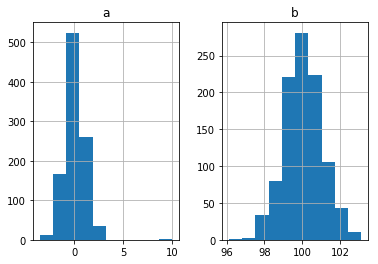

In [6]:
# 異常値をまぜる
df.loc[0,"a"] = 10
df.hist()
plt.show()

正規化の結果


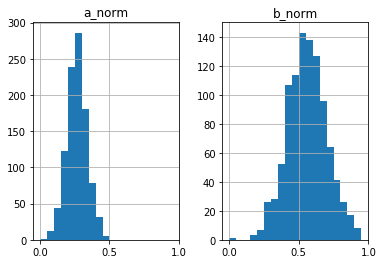

標準化の結果


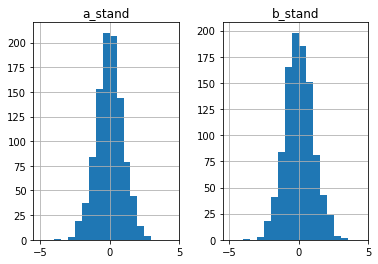

In [7]:
# 正規化
df["a_norm"] = (df["a"] - df["a"].min()) / (df["a"].max() - df["a"].min())
df["b_norm"] = (df["b"] - df["b"].min()) / (df["b"].max() - df["b"].min())

#標準化
df["a_stand"] = (df["a"] - df["a"].mean()) / df["a"].std(ddof=0)
df["b_stand"] = (df["b"] - df["b"].mean()) / df["b"].std(ddof=0)

df.head()

#正規化の結果
df.iloc[:,2:4].hist(bins=np.arange(0,1,.05))
print("正規化の結果")
plt.show()

#標準化の結果
df.iloc[:,4:].hist(bins=np.arange(-5,5,0.5))
print("標準化の結果")
plt.show()

### まとめ
* 0付近にスケーリングしたいのであれば、標準化
* 0-1にスケーリングしたいのであれば、正規化
* 正規化は外れ値の影響を受けやすい

## [演習] ワインデータセットを用いた標準化の練習
* https://archive.ics.uci.edu/ml/datasets/wine
* Class label: イタリアのある地域で栽培されているブドウ品種の種類
* Class label以外：化学的性質
* 化学的性質からブドウ品種を識別する問題

In [8]:
## データを読む
df_wine = pd.read_csv("..//1_data/wine.csv",index_col=[0])
print("")
print("カラム名の確認")
print(df_wine.columns)

print("")
print("データセットの頭出し")
display(df_wine.head())

print("")
print("目的変数となるクラスラベルの内訳")
display(df_wine.groupby(["Class label"])["Class label"].count())

print("")
print("説明変数の要約")
display(df_wine.iloc[:,1:].describe())


カラム名の確認
Index(['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

データセットの頭出し


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735



目的変数となるクラスラベルの内訳


Class label
1    59
2    71
3    48
Name: Class label, dtype: int64


説明変数の要約


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### 散布図の作成
クラスラベルと化学成分の関係を把握するために、グラフを描いてみる

X=Alcohol Y=Malic acid


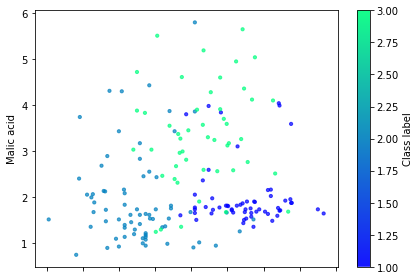

X=Alcohol Y=Ash


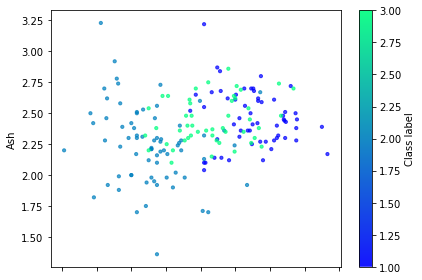

X=Alcohol Y=Alcalinity of ash


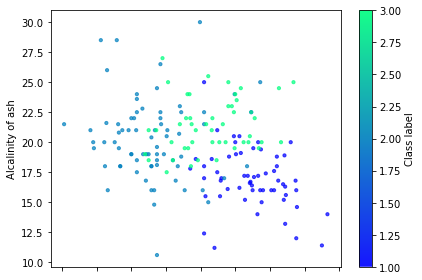

X=Alcohol Y=Magnesium


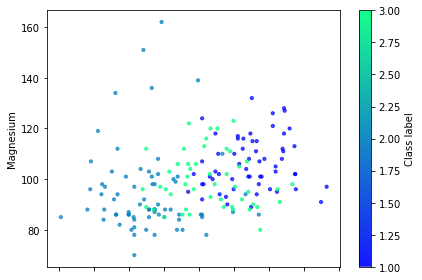

X=Alcohol Y=Total phenols


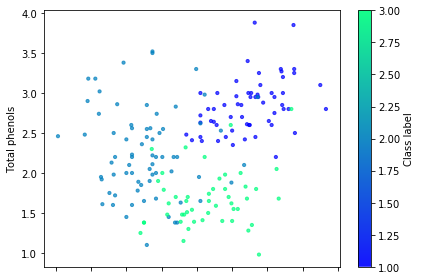

X=Alcohol Y=Flavanoids


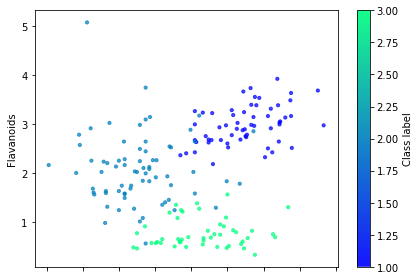

X=Alcohol Y=Nonflavanoid phenols


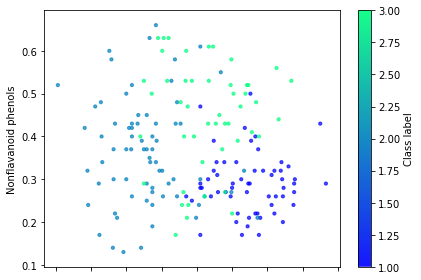

X=Alcohol Y=Proanthocyanins


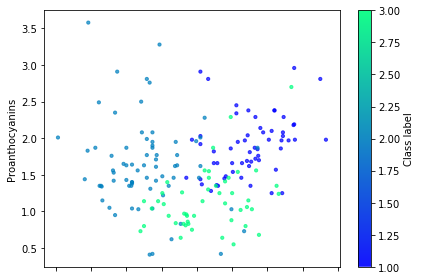

X=Alcohol Y=Color intensity


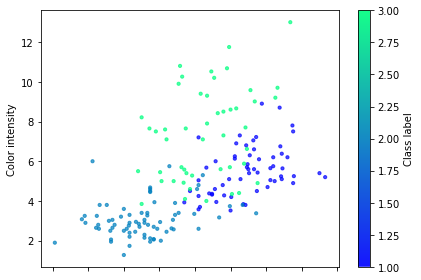

X=Alcohol Y=Hue


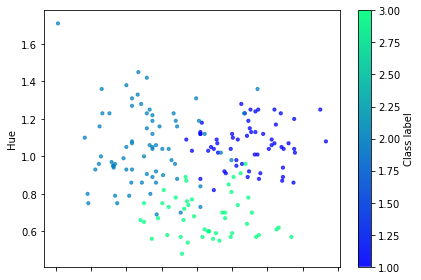

X=Alcohol Y=OD280/OD315 of diluted wines


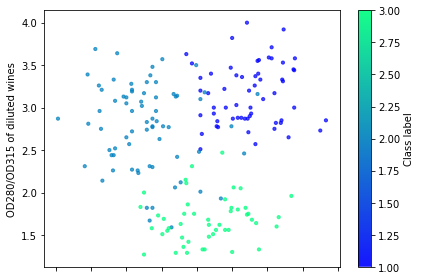

X=Alcohol Y=Proline


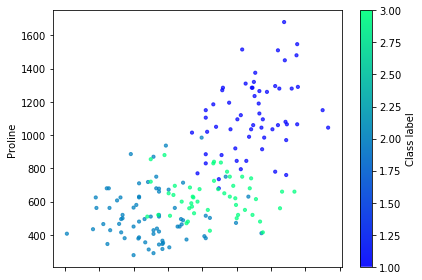

X=Malic acid Y=Ash


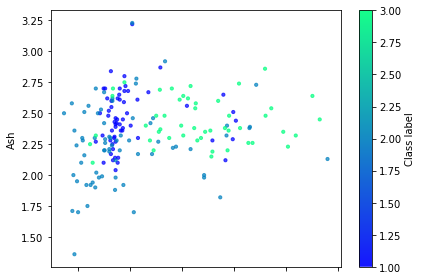

X=Malic acid Y=Alcalinity of ash


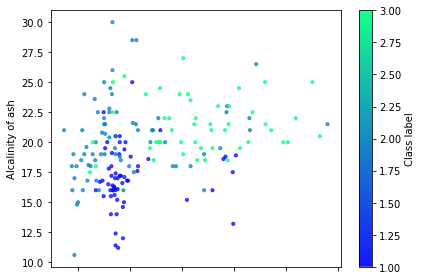

X=Malic acid Y=Magnesium


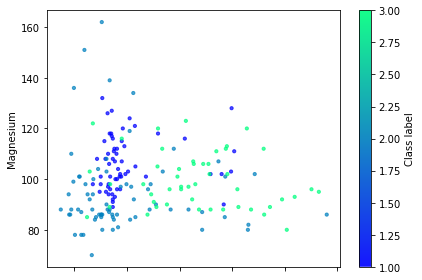

X=Malic acid Y=Total phenols


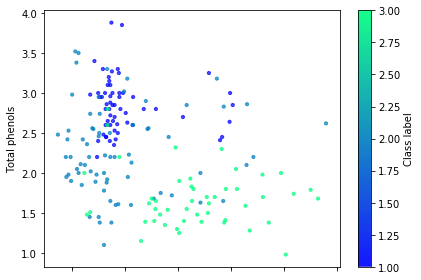

X=Malic acid Y=Flavanoids


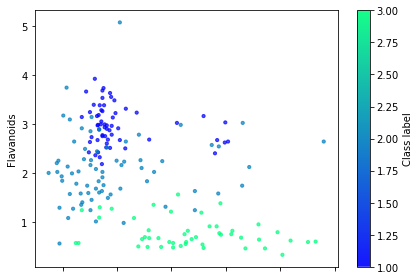

X=Malic acid Y=Nonflavanoid phenols


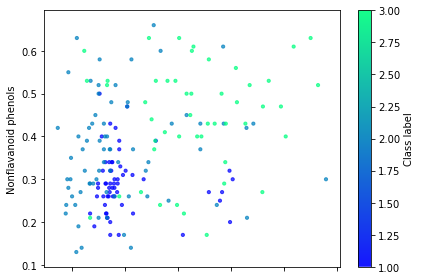

X=Malic acid Y=Proanthocyanins


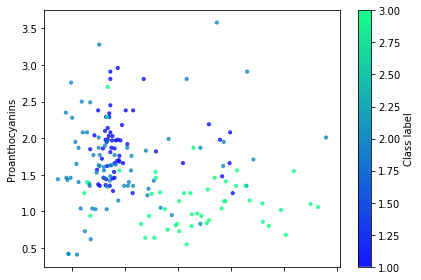

X=Malic acid Y=Color intensity


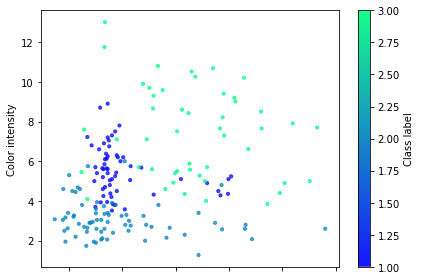

X=Malic acid Y=Hue


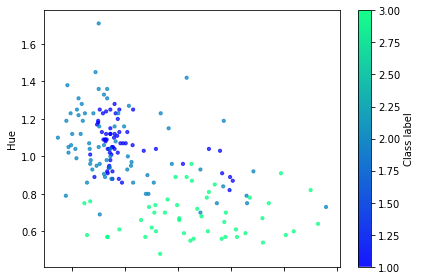

X=Malic acid Y=OD280/OD315 of diluted wines


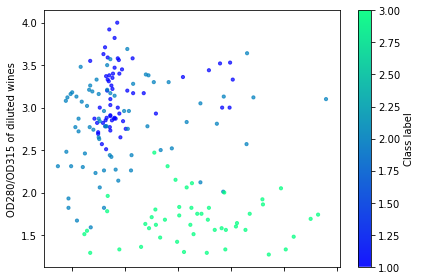

X=Malic acid Y=Proline


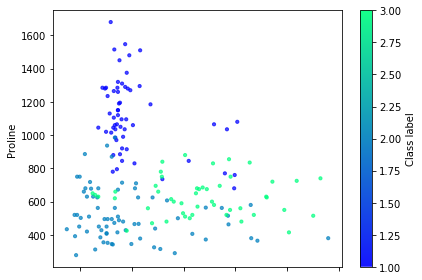

X=Ash Y=Alcalinity of ash


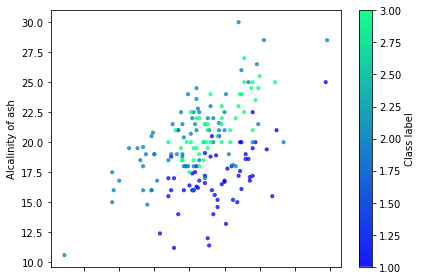

X=Ash Y=Magnesium


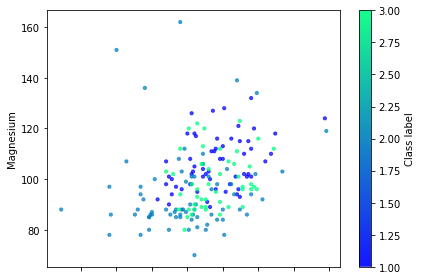

X=Ash Y=Total phenols


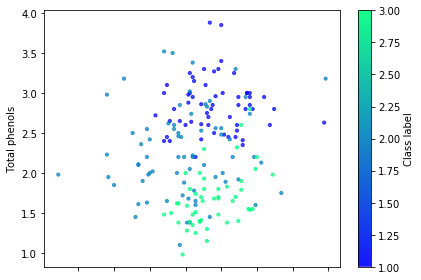

X=Ash Y=Flavanoids


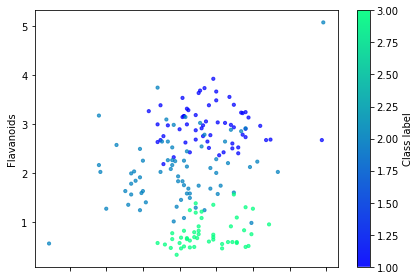

X=Ash Y=Nonflavanoid phenols


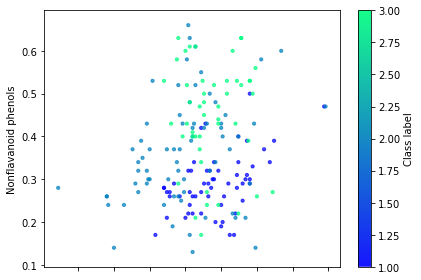

X=Ash Y=Proanthocyanins


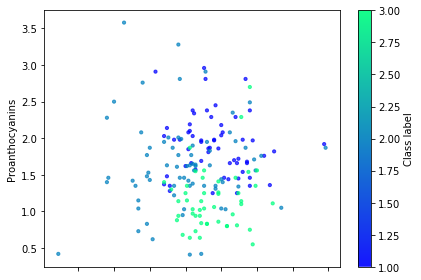

X=Ash Y=Color intensity


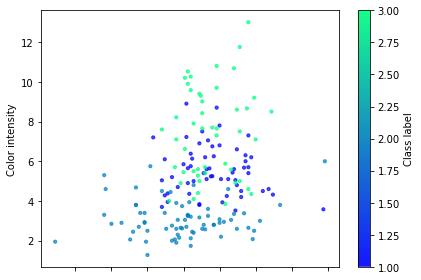

X=Ash Y=Hue


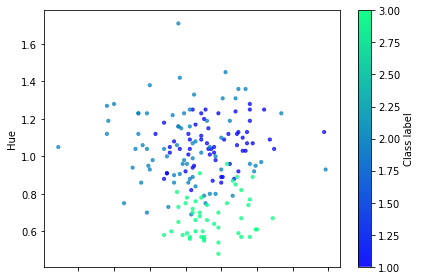

X=Ash Y=OD280/OD315 of diluted wines


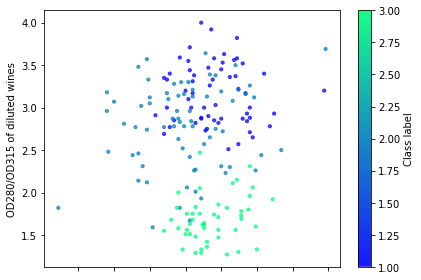

X=Ash Y=Proline


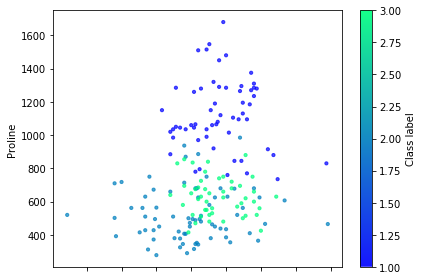

X=Alcalinity of ash Y=Magnesium


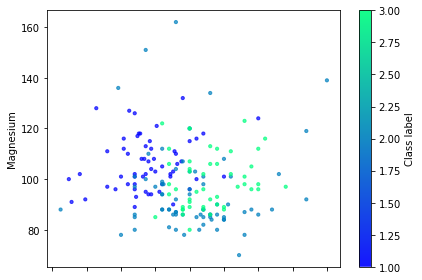

X=Alcalinity of ash Y=Total phenols


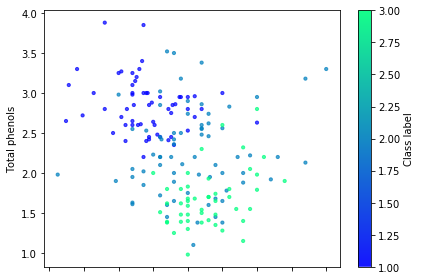

X=Alcalinity of ash Y=Flavanoids


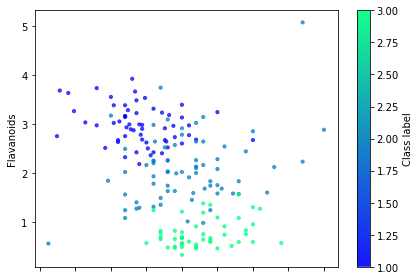

X=Alcalinity of ash Y=Nonflavanoid phenols


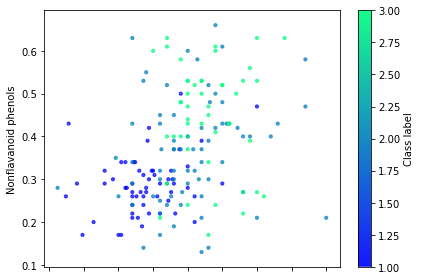

X=Alcalinity of ash Y=Proanthocyanins


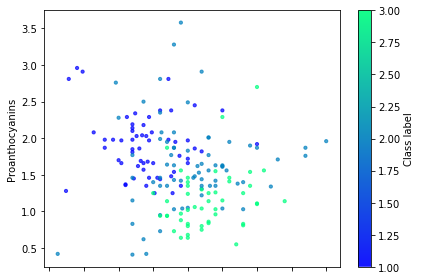

X=Alcalinity of ash Y=Color intensity


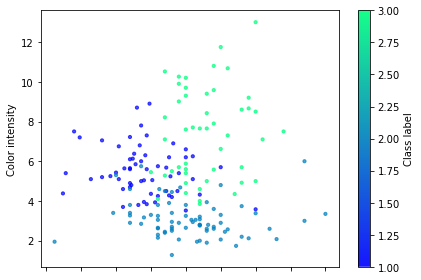

X=Alcalinity of ash Y=Hue


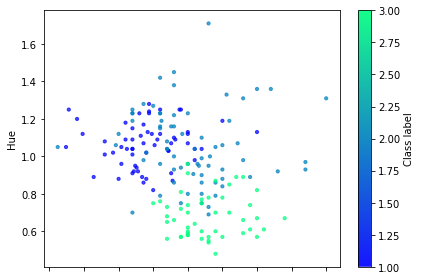

X=Alcalinity of ash Y=OD280/OD315 of diluted wines


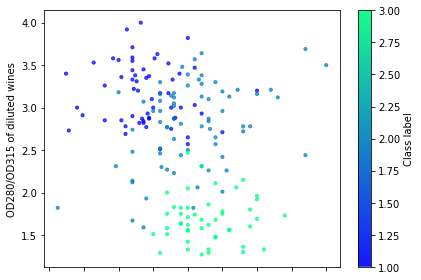

X=Alcalinity of ash Y=Proline


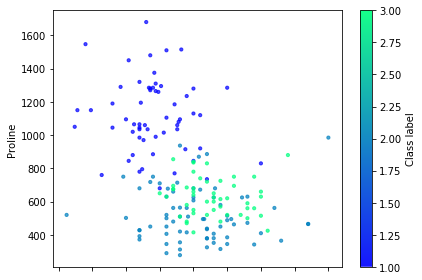

X=Magnesium Y=Total phenols


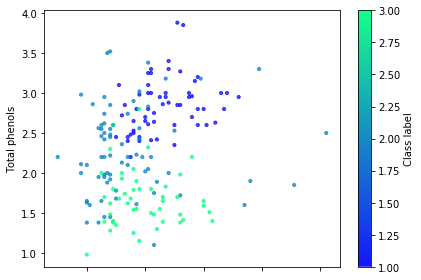

X=Magnesium Y=Flavanoids


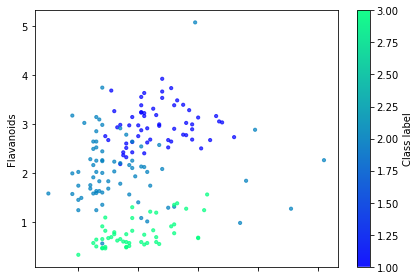

X=Magnesium Y=Nonflavanoid phenols


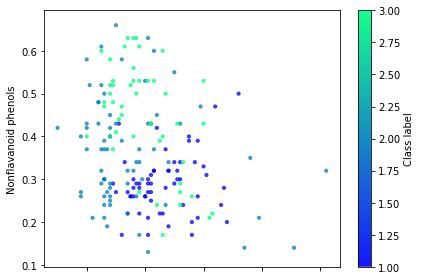

X=Magnesium Y=Proanthocyanins


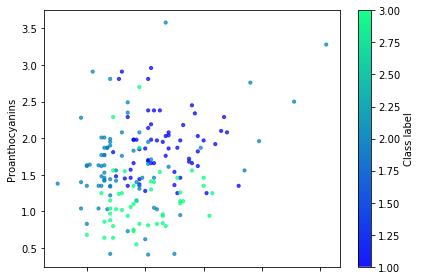

X=Magnesium Y=Color intensity


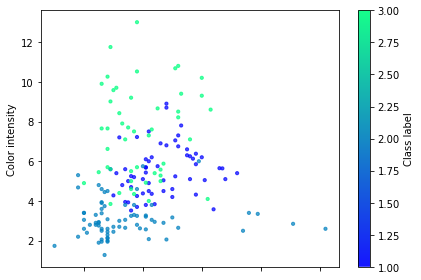

X=Magnesium Y=Hue


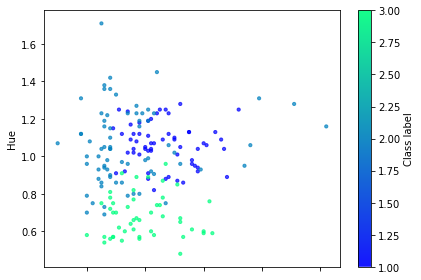

X=Magnesium Y=OD280/OD315 of diluted wines


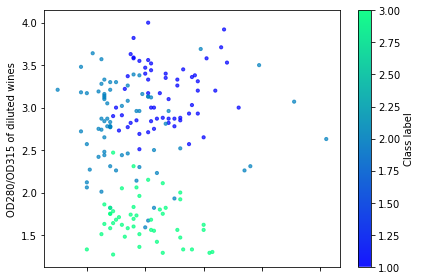

X=Magnesium Y=Proline


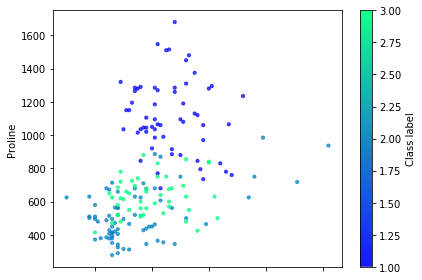

X=Total phenols Y=Flavanoids


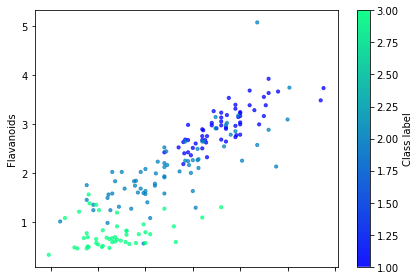

X=Total phenols Y=Nonflavanoid phenols


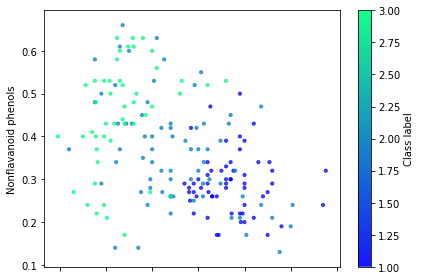

X=Total phenols Y=Proanthocyanins


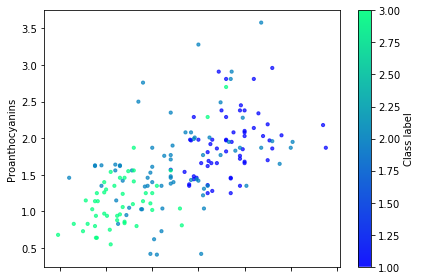

X=Total phenols Y=Color intensity


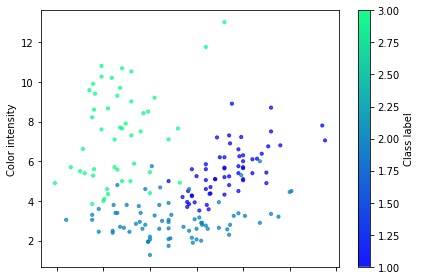

X=Total phenols Y=Hue


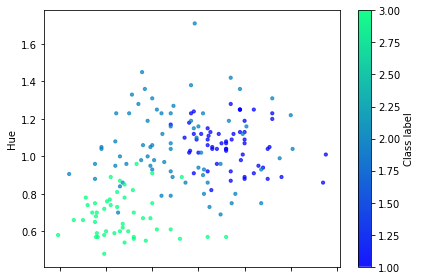

X=Total phenols Y=OD280/OD315 of diluted wines


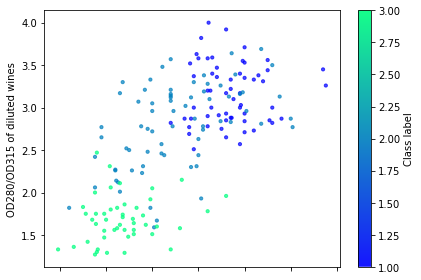

X=Total phenols Y=Proline


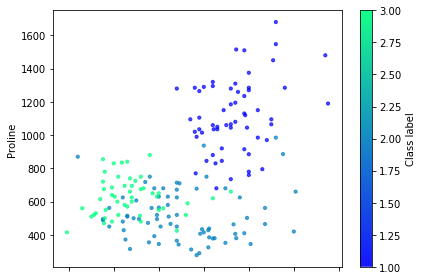

X=Flavanoids Y=Nonflavanoid phenols


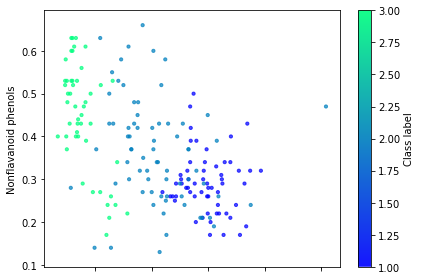

X=Flavanoids Y=Proanthocyanins


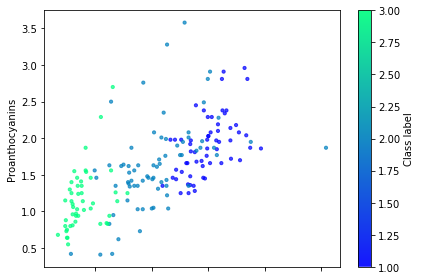

X=Flavanoids Y=Color intensity


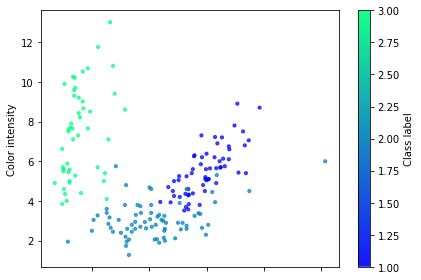

X=Flavanoids Y=Hue


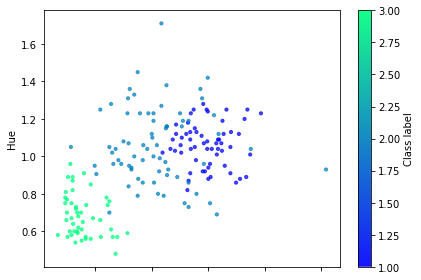

X=Flavanoids Y=OD280/OD315 of diluted wines


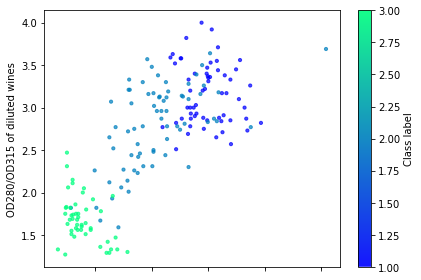

X=Flavanoids Y=Proline


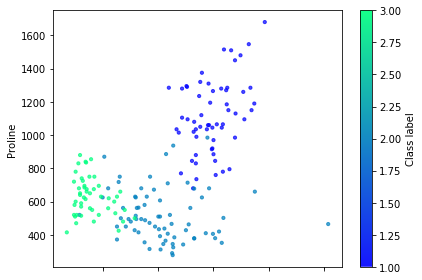

X=Nonflavanoid phenols Y=Proanthocyanins


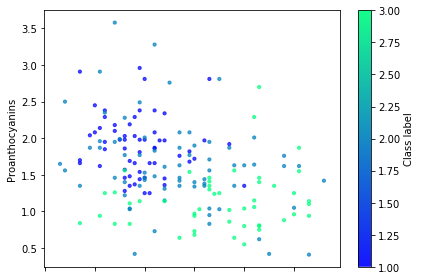

X=Nonflavanoid phenols Y=Color intensity


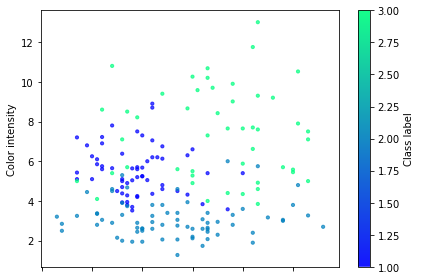

X=Nonflavanoid phenols Y=Hue


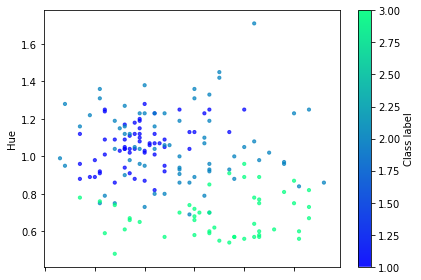

X=Nonflavanoid phenols Y=OD280/OD315 of diluted wines


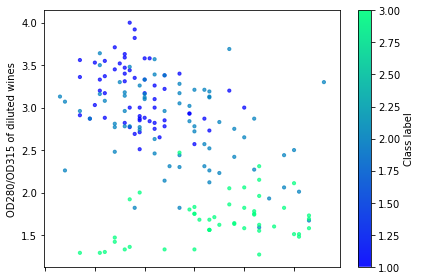

X=Nonflavanoid phenols Y=Proline


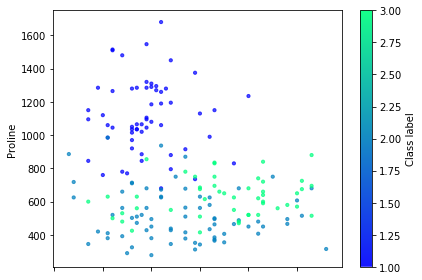

X=Proanthocyanins Y=Color intensity


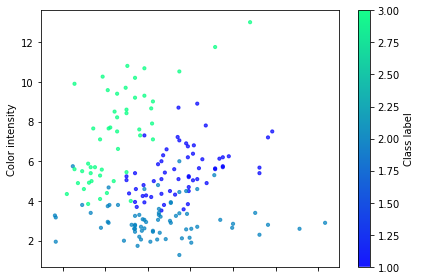

X=Proanthocyanins Y=Hue


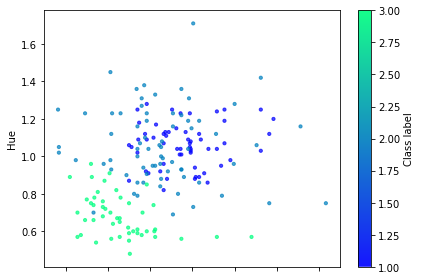

X=Proanthocyanins Y=OD280/OD315 of diluted wines


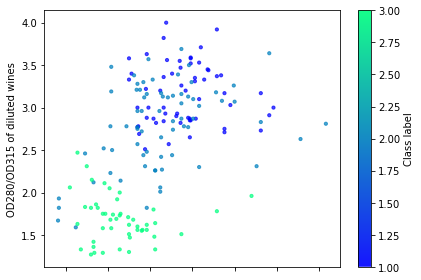

X=Proanthocyanins Y=Proline


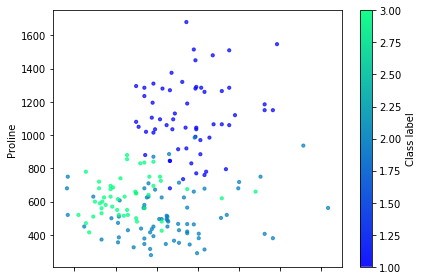

X=Color intensity Y=Hue


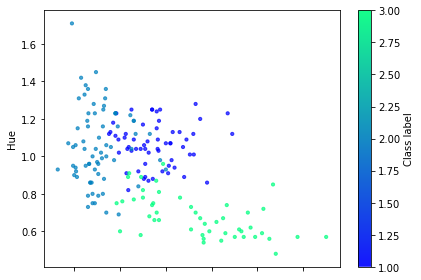

X=Color intensity Y=OD280/OD315 of diluted wines


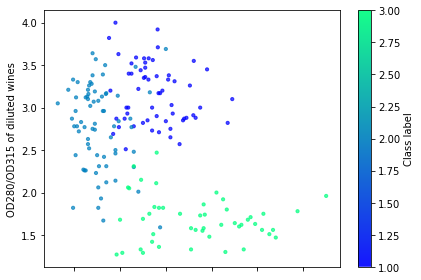

X=Color intensity Y=Proline


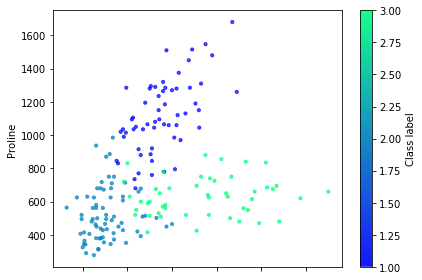

X=Hue Y=OD280/OD315 of diluted wines


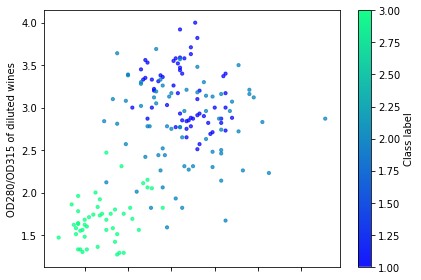

X=Hue Y=Proline


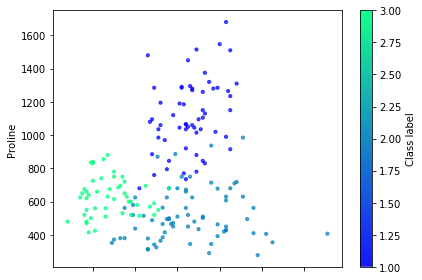

X=OD280/OD315 of diluted wines Y=Proline


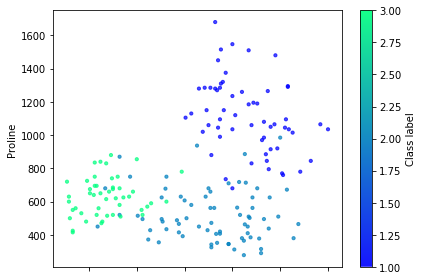

In [9]:
import itertools
li_combi = list(itertools.combinations(df_wine.columns[1:], 2))
for X,Y in li_combi:
    print("X=%s"%X,"Y=%s"%Y)
    df_wine.plot(kind="scatter",x=X,y=Y,alpha=0.7,s=10,c="Class label",colormap="winter")#散布図の作成
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.tight_layout()
    plt.show()#グラフをここで描画させるための行

### 学習用データとテストデータに分ける

In [10]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:,1:].values, df_wine["Class label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
display(X_train)
display(X_test)
display(y_train)
display(y_test)

array([[1.371e+01, 1.860e+00, 2.360e+00, ..., 1.110e+00, 4.000e+00,
        1.035e+03],
       [1.222e+01, 1.290e+00, 1.940e+00, ..., 8.600e-01, 3.020e+00,
        3.120e+02],
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       ...,
       [1.242e+01, 1.610e+00, 2.190e+00, ..., 1.060e+00, 2.960e+00,
        3.450e+02],
       [1.390e+01, 1.680e+00, 2.120e+00, ..., 9.100e-01, 3.330e+00,
        9.850e+02],
       [1.416e+01, 2.510e+00, 2.480e+00, ..., 6.200e-01, 1.710e+00,
        6.600e+02]])

array([[1.374e+01, 1.670e+00, 2.250e+00, 1.640e+01, 1.180e+02, 2.600e+00,
        2.900e+00, 2.100e-01, 1.620e+00, 5.850e+00, 9.200e-01, 3.200e+00,
        1.060e+03],
       [1.279e+01, 2.670e+00, 2.480e+00, 2.200e+01, 1.120e+02, 1.480e+00,
        1.360e+00, 2.400e-01, 1.260e+00, 1.080e+01, 4.800e-01, 1.470e+00,
        4.800e+02],
       [1.237e+01, 1.130e+00, 2.160e+00, 1.900e+01, 8.700e+01, 3.500e+00,
        3.100e+00, 1.900e-01, 1.870e+00, 4.450e+00, 1.220e+00, 2.870e+00,
        4.200e+02],
       [1.356e+01, 1.730e+00, 2.460e+00, 2.050e+01, 1.160e+02, 2.960e+00,
        2.780e+00, 2.000e-01, 2.450e+00, 6.250e+00, 9.800e-01, 3.030e+00,
        1.120e+03],
       [1.305e+01, 5.800e+00, 2.130e+00, 2.150e+01, 8.600e+01, 2.620e+00,
        2.650e+00, 3.000e-01, 2.010e+00, 2.600e+00, 7.300e-01, 3.100e+00,
        3.800e+02],
       [1.156e+01, 2.050e+00, 3.230e+00, 2.850e+01, 1.190e+02, 3.180e+00,
        5.080e+00, 4.700e-01, 1.870e+00, 6.000e+00, 9.300e-01, 3.690e+00,
        4.65

array([1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       3, 3, 2, 2, 2, 3, 3, 1, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1,
       1, 2, 1, 2, 2, 1, 3, 2, 1, 2, 2, 2, 3, 1, 3, 3, 1, 1, 2, 3, 1, 1,
       2, 2, 1, 1, 1, 3, 2, 1, 2, 3, 1, 2, 3, 3, 1, 1, 3, 1, 3, 2, 1, 1,
       2, 1, 3, 2, 3, 1, 3, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3, 3,
       1, 1, 3, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 3])

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2, 1, 3, 2, 3, 1, 3, 3, 1, 3])

(array([ 1.,  6., 14., 20., 16., 18., 18., 17., 10.,  4.]),
 array([11.03 , 11.402, 11.774, 12.146, 12.518, 12.89 , 13.262, 13.634,
        14.006, 14.378, 14.75 ]),
 <a list of 10 Patch objects>)

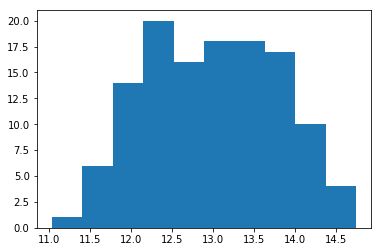

In [11]:
# まずは正規化・標準化する前の1つ目の特徴に関するヒストグラムを出してみる
plt.hist(X_train[:, 0]) # 学習用データ

(array([ 3.,  5.,  9.,  6.,  6.,  4., 11.,  3.,  6.,  1.]),
 array([11.41 , 11.752, 12.094, 12.436, 12.778, 13.12 , 13.462, 13.804,
        14.146, 14.488, 14.83 ]),
 <a list of 10 Patch objects>)

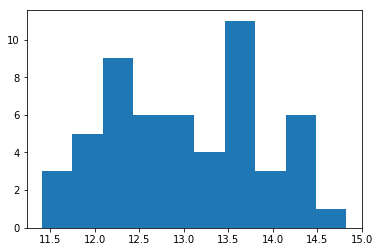

In [12]:
plt.hist(X_test[:, 0]) # テスト用データ

### [演習] 正規化・標準化
* 以下の*をtrainまたはtestに置き換えましょう

正規化または標準化を行うときは、まず学習用データだけでfitさせ、その係数を使ってテストデータの正規化または標準化を行うこと

(array([ 1.,  6., 14., 20., 16., 18., 18., 17., 10.,  4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

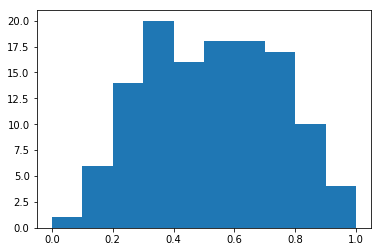

In [13]:
#ワインデータの正規化
normsc = MinMaxScaler()
X_train_norm = normsc.fit_transform(X_train)
plt.hist(X_train_norm[:, 0]) #正規化後の1つ目の特徴に関するヒストグラム（学習用データ）

(array([ 3.,  5.,  9.,  6.,  6.,  4., 11.,  3.,  6.,  1.]),
 array([0.10215054, 0.19408602, 0.28602151, 0.37795699, 0.46989247,
        0.56182796, 0.65376344, 0.74569892, 0.83763441, 0.92956989,
        1.02150538]),
 <a list of 10 Patch objects>)

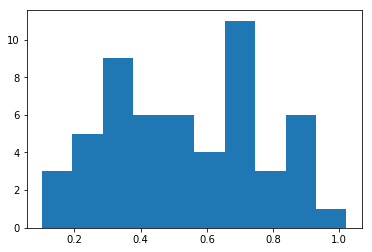

In [14]:
X_test_norm = normsc.transform(X_test)
plt.hist(X_test_norm[:, 0]) #正規化後の1つ目の特徴に関するヒストグラム（テストデータ）

(array([ 1.,  6., 14., 20., 16., 18., 18., 17., 10.,  4.]),
 array([-2.44713722, -1.98103124, -1.51492526, -1.04881929, -0.58271331,
        -0.11660733,  0.34949865,  0.81560462,  1.2817106 ,  1.74781658,
         2.21392256]),
 <a list of 10 Patch objects>)

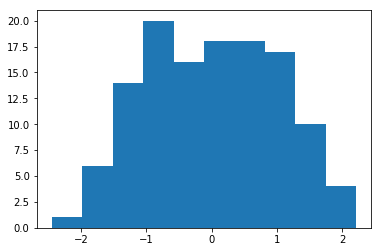

In [15]:
#ワインデータの標準化
stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train)
plt.hist(X_train_stand[:, 0]) #標準化後の1つ目の特徴に関するヒストグラム（学習用データ）

(array([ 3.,  5.,  9.,  6.,  6.,  4., 11.,  3.,  6.,  1.]),
 array([-1.97100746, -1.54249067, -1.11397389, -0.6854571 , -0.25694031,
         0.17157647,  0.60009326,  1.02861004,  1.45712683,  1.88564362,
         2.3141604 ]),
 <a list of 10 Patch objects>)

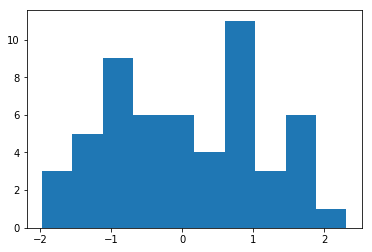

In [16]:
X_test_stand = stdsc.transform(X_test)
plt.hist(X_test_stand[:, 0]) #標準化後の1つ目の特徴に関するヒストグラム（テストデータ）